In [25]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties



## read the simulation parameter

In [26]:
with open("../tmp/plbLog.dat","r") as fp:
    para=fp.read()
print(para)

Poiseuille flow

Velocity in lattice units: u=0.01
Reynolds number:           Re=600
Lattice resolution:        N=100
Relaxation frequency:      omega=1.9802
Extent of the system:      lx=6
Extent of the system:      ly=1
Extent of the system:      lz=0
Grid spacing deltaX:       dx=0.01
Time step deltaT:          dt=0.0001



In [27]:
dx=0.01
nx=601
ny=101
lx=(nx-1)*dx
ly=(ny-1)*dx
cell_num=nx*ny
print("cell number",cell_num)

cell number 60701


In [28]:
x_lb=np.arange(0,nx,1)
y_lb=np.arange(0,ny,1)
x_phsy=x_lb*dx
y_phsy=y_lb*dx
grid_x_lb,grid_y_lb=np.meshgrid(x_lb,y_lb)
grid_x_lb=grid_x_lb.T
grid_y_lb=grid_y_lb.T
grid_x_phsy=grid_x_lb*dx
grid_y_phsy=grid_y_lb*dx
print("grid x shape：",grid_x_lb.shape)
print("grid y shape：",grid_y_lb.shape)

grid x shape： (601, 101)
grid y shape： (601, 101)


## Physical Field Contour

### density field

In [29]:
def read_scalar_field_2d(file,nx,ny):
    with open(file,"r") as fp:
        scalar_field_text=fp.read()
    array=np.fromstring(scalar_field_text, dtype=float, sep=' ')
    scalar_field=np.reshape(array,(nx,ny))
    print("scalar field shape：",scalar_field.shape)
    return scalar_field



In [30]:
grid_density=read_scalar_field_2d("../tmp/density030000.dat",nx,ny)


scalar field shape： (601, 101)


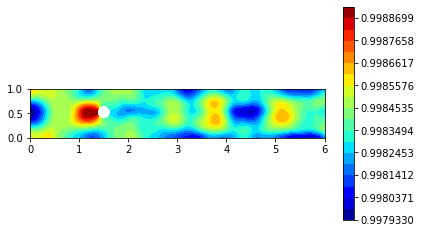

In [31]:
fig, ax = plt.subplots()
levels=np.linspace(np.min(grid_density[grid_density>0]),np.max(grid_density),20)
cp = ax.contourf(grid_x_phsy, grid_y_phsy, grid_density,levels=levels,cmap="jet") #"rainbow"
cb = fig.colorbar(cp, shrink=0.8)
ax.axis([0,lx,0,ly])
ax.set_aspect('equal')
fig.tight_layout()


### velocity norms contour

In [32]:
grid_vel_norms=read_scalar_field_2d("../tmp/velocityNorm030000.dat",nx,ny)

scalar field shape： (601, 101)


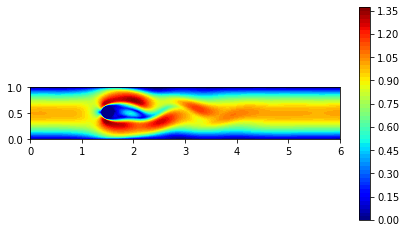

In [33]:
fig2, ax2 = plt.subplots()
cp = ax2.contourf(grid_x_phsy, grid_y_phsy, grid_vel_norms,levels=60,cmap="jet") #"rainbow"
cb = fig2.colorbar(cp, shrink=0.8)
ax2.axis([0,lx,0,ly])
ax2.set_aspect('equal')
fig2.tight_layout()


### velocity quiver

reference:

1. https://matplotlib.org/3.1.0/gallery/images_contours_and_fields/quiver_simple_demo.html#sphx-glr-gallery-images-contours-and-fields-quiver-simple-demo-py 

2. https://matplotlib.org/3.1.0/gallery/images_contours_and_fields/quiver_demo.html#sphx-glr-gallery-images-contours-and-fields-quiver-demo-py



In [34]:
with open("../tmp/velocity030000.dat","r") as fp:
    vel_text=fp.read()
vels=np.fromstring(vel_text, dtype=float, sep=' ')
grid_vels=np.reshape(vels,(nx,ny,2))
grid_vel_x=grid_vels[:,:,0]
grid_vel_y=grid_vels[:,:,1]
print("grid vels：",grid_vels.shape)
print("grid vel x component：",grid_vel_x.shape)
print("grid vel y component：",grid_vel_y.shape)



grid vels： (601, 101, 2)
grid vel x component： (601, 101)
grid vel y component： (601, 101)


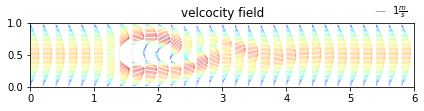

In [35]:
fig3, ax3 = plt.subplots()
x_sparse_factor=20
y_sparse_factor=2
M = np.hypot(grid_vel_x, grid_vel_y)
Q = ax3.quiver(grid_x_phsy[::x_sparse_factor,::y_sparse_factor], grid_y_phsy[::x_sparse_factor,::y_sparse_factor], 
    grid_vel_x[::x_sparse_factor,::y_sparse_factor], grid_vel_y[::x_sparse_factor,::y_sparse_factor], 
    M[::x_sparse_factor,::y_sparse_factor], units='x', pivot='tail', width=0.005,scale=1 / 0.15,cmap="jet")
# fig3.colorbar(Q)
qk = ax3.quiverkey(Q, 0.9, 0.65, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
ax3.set_title("velcocity field")                   
ax3.axis([0,lx,0,ly])
ax3.set_aspect('equal')
fig3.tight_layout()

### streamline 
reference: https://matplotlib.org/gallery/images_contours_and_fields/plot_streamplot.htmlm

In [36]:
ax4.streamplot?

Signature:
ax4.streamplot(
    x,
    y,
    u,
    v,
    density=1,
    linewidth=None,
    color=None,
    cmap=None,
    norm=None,
    arrowsize=1,
    arrowstyle='-|>',
    minlength=0.1,
    transform=None,
    zorder=None,
    start_points=None,
    maxlength=4.0,
    integration_direction='both',
    *,
    data=None,
)
Docstring:
Draw streamlines of a vector flow.

Parameters
----------
x, y : 1D arrays
    An evenly spaced grid.
u, v : 2D arrays
    *x* and *y*-velocities. The number of rows and columns must match
    the length of *y* and *x*, respectively.
density : float or (float, float)
    Controls the closeness of streamlines. When ``density = 1``, the domain
    is divided into a 30x30 grid. *density* linearly scales this grid.
    Each cell in the grid can have, at most, one traversing streamline.
    For different densities in each direction, use a tuple
    (density_x, density_y).
linewidth : float or 2D array
    The width of the stream lines. With a 2D array the

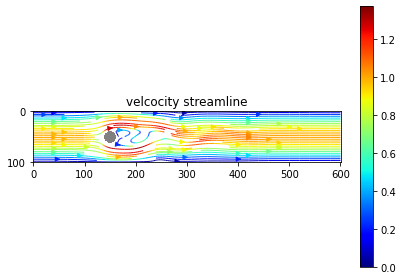

In [37]:
fig4, ax4 = plt.subplots()

## stream plot
M = np.hypot(grid_vel_x, grid_vel_y)
strm = ax4.streamplot(x_lb,y_lb,grid_vel_x.T,grid_vel_y.T, color=M.T, linewidth=1, cmap='jet')
fig4.colorbar(strm.lines)

## create mask
import math
mask = np.zeros(grid_vel_x.shape, dtype=bool)
cx=(int)((nx-1)/4)
cy=(int)((ny-1)/2)+2
radius=(int)(cy/4)
for i in np.arange(0,mask.shape[0],1):
    for j in np.arange(0,mask.shape[1],1):
        if (i-cx)**2+(j-cy)**2<=radius**2:
            mask[i,j]=1
mask = np.ma.masked_where(mask==0, mask)
ax4.imshow(~mask.T, alpha=0.5, cmap='gray', aspect='auto')

ax4.set_title("velcocity streamline")                   
ax4.set_aspect('equal')
fig4.tight_layout()


## Line Plot

In [38]:
font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')
font.set_style('normal')
font.set_size(12)

Text(0.5, 1.0, 'Velocity Norm Along the Box Centerline')

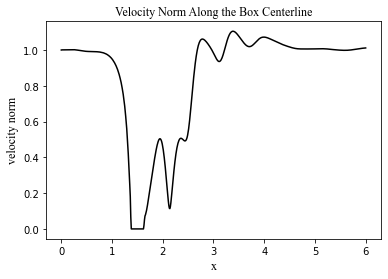

In [39]:
y_mid=(int)((ny-1)/2)
vel_on_y_mid=grid_vel_norms[:,y_mid]
fig,ax=plt.subplots()
ax.plot(x_phsy,vel_on_y_mid,"-k")
ax.set_xlabel("x",FontProperties=font)
ax.set_ylabel("velocity norm",FontProperties=font)
ax.set_title("Velocity Norm Along the Box Centerline",FontProperties=font)

Text(0.5, 1.0, 'Velocity Norm Along the Cylinder Y-Centerline')

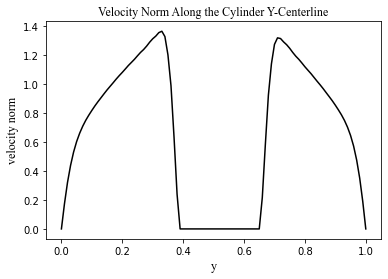

In [40]:
x_cylinder_mid=(int)((nx-1)/4)
vel_on_x_cylinder_mid=grid_vel_norms[x_cylinder_mid,:]
fig,ax=plt.subplots()
ax.plot(y_phsy,vel_on_x_cylinder_mid,"-k")
ax.set_xlabel("y",FontProperties=font)
ax.set_ylabel("velocity norm",FontProperties=font)
ax.set_title("Velocity Norm Along the Cylinder Y-Centerline",FontProperties=font)